In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub       # pip install tensorflow_hub
import tf_keras    # normally we use only keras if we get error then import tf_keras


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tf_keras as keras

### without using the tf_keras we get this this type of error 
### normally we are using keras if we get keras error then only import tf_keras

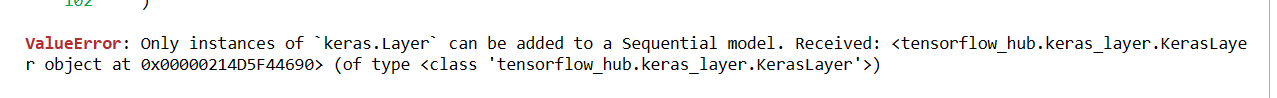

#  pre-trained model

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf_keras.Sequential([
    hub.keras_layer.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])


##  The above link is the mobilenet_v2 , we can use any pretrained keras 

## by using the below link
https://keras.io/api/applications/

## By the image link we can directly dowmload the data by using keras 

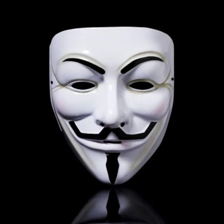

In [4]:
goldfish = tf.keras.utils.get_file('image.jpg','https://m.media-amazon.com/images/I/31Ve7dbI+SL._AC_UY1100_.jpg' , cache_dir='D:\anacoda\DL DATA NOTES')
goldfish = Image.open(goldfish).resize(IMAGE_SHAPE)
goldfish

## Then Covert into a numpy array 

In [5]:
goldfish = np.array(goldfish)
goldfish.shape

(224, 224, 3)

In [6]:
goldfish

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

##  Divide by the max_ value to get Good Accureacy

In [7]:
np.max(goldfish)

255

In [8]:
goldfish = goldfish/255
goldfish 

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

##  add a batch dimension , by using newaxis

In [9]:
new_axis = goldfish[np.newaxis , ...]
new_axis.shape

(1, 224, 224, 3)

## prediction 

In [10]:
prediction = classifier.predict(new_axis)
prediction

1/1 [==============================] - 13s 13s/step


array([[ 0.24568883,  1.112265  , -1.033834  , ..., -1.0862516 ,
        -1.0643024 ,  0.05280267]], dtype=float32)

In [11]:
prediction.shape

(1, 1001)

## prediction argmax 

In [12]:
predicted_lable_index = np.argmax(prediction)
predicted_lable_index

644

## ImageNetLables 

In [13]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
data_dir = tf.keras.utils.get_file('ImageNetLabels.txt', origin=dataset_url,  cache_dir='D:\anacoda\DL DATA NOTES')

# no need to convert into a windowspath , beacuse it is a text

In [14]:
imagenet_labels =np.array(open(data_dir).read().splitlines())    # little bit confusion
imagenet_labels[:5]  

array(['background', 'tench', 'goldfish', 'great white shark',
       'tiger shark'], dtype='<U30')

In [15]:
imagenet_labels[predicted_lable_index]

'mask'

# 

# 

#  It is another example for flowers transfer learning

In [16]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir_1 = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='D:\anacoda\DL DATA NOTES', untar=True)

In [17]:
import pathlib
data_dir_1 = pathlib.Path(data_dir_1)
data_dir_1

WindowsPath('/tmp/.keras/datasets/flower_photos')

In [18]:
list(data_dir_1.glob('*/*.jpg'))[:5]

[WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [19]:
roses = list(data_dir_1.glob('roses/*'))      # by the place of roses we can use daisy , tulips etc ...,
roses[:5]

[WindowsPath('/tmp/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

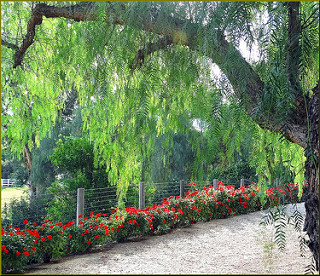

In [20]:
Image.open(roses[5])

In [21]:
flowers_images_dict = {
    'roses': list(data_dir_1.glob('roses/*')),
    'daisy': list(data_dir_1.glob('daisy/*')),
    'dandelion': list(data_dir_1.glob('dandelion/*')),
    'sunflowers': list(data_dir_1.glob('sunflowers/*')),
    'tulips': list(data_dir_1.glob('tulips/*')),
}

In [22]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [23]:

x, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:                               # we are convert the combine-images into seperate image
        img = cv2.imread(str(image))                   # first imread the images 
        resized_img = cv2.resize(img,IMAGE_SHAPE)        # next resize the image
        x.append(resized_img)                          # x is the imge size 
        y.append(flowers_labels_dict[flower_name])     # y should be only in numbers , lables of the flowers

In [24]:
x = np.array(x)
x.shape

(3670, 224, 224, 3)

In [25]:
y = np.array(y)
y.shape

(3670,)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size=0.2, random_state=0) 

In [28]:
x_train_scaled = x_train/255
x_test_scaled =  x_test / 255

## ImageNetLables 

In [54]:
imagenet_labels =np.array(open(data_dir).read().splitlines())    # little bit confusion
imagenet_labels[:5] 

array(['background', 'tench', 'goldfish', 'great white shark',
       'tiger shark'], dtype='<U30')

##  x

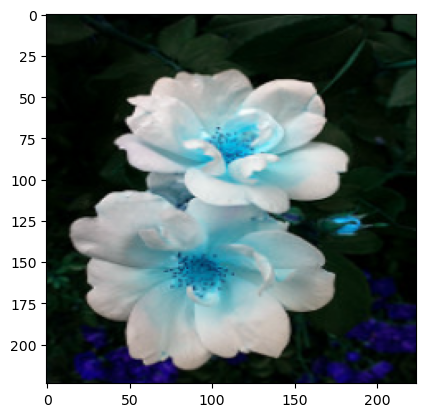

In [79]:
plt.imshow(x[0])

## predict 

In [80]:
pred = classifier.predict(np.array([x[0]]))

1/1 [==============================] - 0s 479ms/step


In [81]:
pred

array([[ 0.2271873,  0.39299  ,  1.473066 , ..., -1.2507938, -1.9604867,
         3.8786237]], dtype=float32)

In [82]:
Z = np.argmax(pred)
Z

795

In [83]:
imagenet_labels[Z]

'shower curtain'

##  x_train_scaled    ' OR  '  x_test_scaled

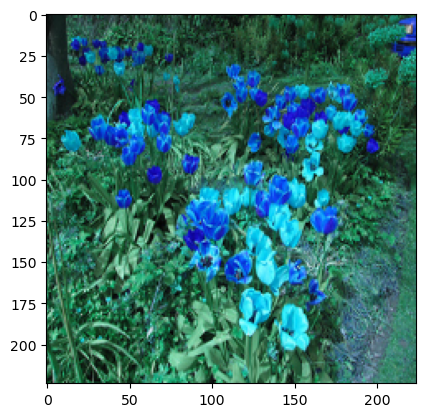

In [84]:
plt.imshow(x_train_scaled[8])

##  predict

In [85]:
predicted = classifier.predict(np.array([x_train_scaled[8]]))   # we must use np.array([x[index]])

1/1 [==============================] - 0s 464ms/step


In [86]:
predicted

array([[ 0.08824855, -1.3401101 ,  0.5441779 , ...,  1.8407263 ,
         0.40692365, -0.1343157 ]], dtype=float32)

In [87]:
z = np.argmax(predicted)
z

974

In [88]:
imagenet_labels[z]

'coral reef'

### if we want more predicts at a time then use below process 

In [93]:
predicted_1 = classifier.predict(np.array([x[0] , x_test_scaled[8] ,x[2]]))

1/1 [==============================] - 0s 133ms/step


In [94]:
z1 = np.argmax(predicted_1 , axis=1)
z1

array([795, 945, 795], dtype=int64)

In [95]:
imagenet_labels[z1]

array(['shower curtain', 'artichoke', 'shower curtain'], dtype='<U30')